# Project 5: Vision (Part 2)

Due Date: Monday, March 23, 2020 @ 11:59 P.M.

Student #1 Name: Fei Ding

Student #2 Name: Zhen Jiang

Student #3 Name: Francis Kim

Student #4 Name: Eric Yan

In this part of project 5, you will be using the images you captured during part 1 to compute the change in orientation as the duckiebot moves along the road.  

##1. SETUP

We are assuming that project 5 part 1 was successfully completed and:

a) You have your 20+ images saved in a google drive folder.

b) You have recorded ground truth for the robot's final pose.

For this part of project 5, you will continue to work in the 4-person groups from part 1. Starting today, we will not allow further team switching. Please let us know if your partner team has been unresponsive. Below is the link to the sheet listing team pairs for reference:

https://drive.google.com/file/d/1sS5btopwpchRhY5tD6-70TqP8LkjjpSg/view?usp=sharing

In the code below, fill in all of the sections marked TODO.

There are unit tests to test each of the students functions that they fill as well.

##Reference Material to help write the code

###Goal of this project
In this project, you will be using the images of the road and lanes captured while the duckiebot was driving, to figure out the orientation of the duckiebot throughout its trajectory. Using this sequence of orientations, you 
can interpolate a path that the duckiebot has taken, and although it won't be done in this lab, fix the heading of the duckiebot so that it drives between the lanes of the road.

###Steps to calculate orientation of robot
The overall steps you will follow are:

- Pick some arbitrary distances from the duckiebot in the Z-axis of the road at which we would want to find the lane markings. For example, 50cm and 100 cm depth.
- Compute the v coordinate in the image (row within the image, which we'll call a scanline) which corresponds to the chosen depth or Z values to find the lanes. 
- Find the left and right lane boundary's u coordinates in the image corresponding to the v values. Now we have image coordinates (u, v) of points on the left and right lanes.
- Convert the (u, v) coordinates of the lanes to camera coordinates: (X, Y, Z)
- Compute the line direction vector for the left lane and right lane respectively using the (X, Y, Z) points on those lanes.
- Average the two lines to find the optimal straight line in between the two lanes, and to remove noise.
- Find theta of the robot by computing the angle of the lane direction vector with respect to the camera optical axis.

More details on the math behind these steps are below.

###Detailed Description of Steps

####Math Intuition behind the camera coordinate to image coordinate frame transform equation

<!-- ![pinhole camera image](https://drive.google.com/uc?id=1uHU_NMLNZNOgVHhK8sUhjVDPE-36aUhz)  -->

<figure>
<center>
<img width=520 height=450 src='https://drive.google.com/uc?id=1_IpRY2DjkjEnzvXTXlurNJa8VLt7p85K' />
<figcaption>Pinhole Camera</figcaption></center>
</figure>

Image Link: https://drive.google.com/open?id=1_IpRY2DjkjEnzvXTXlurNJa8VLt7p85K

Thus, given 3 variables, we can determine the 4th one using the above formula.
We will be using this formula to find the image coordinate v for the real word coordinate z and vice-versa.

###Reference frames Description

We will discuss the following reference frames in this project: 

- Road frame: reference frame with origin on the road directly below the duckiebot camera (between the front wheels). Z axis projects out in front of the duckiebot. X axis goes from left to right with respect to the duckiebot. And Y axis goes up and down. 

- IMPORTANT NOTE: The y coordinate of the robot that the students collected in part 1 of project 5, is really a z coordinate in the road frame, so keep that in mind.

- Camera frame: reference frame with origin on the camera lens. Z axis projects out in front of the camera lens. X axis goes from left to right with respect to the camera lens. And Y axis goes up and down.
Note: Camera frame and road frame will have the same X axis coordinates. However, if the camera is tiled with a pitch and is not parallel to road, both the Z axis and Y axis coordinates will be different for road and camera reference frames.

- Image frame: 2-D reference frame of the actual digital image. The origin is the top left of the image as shown below, with u going from left to right, and v going from up to down.

<figure>
<center>
<img width=180 height=150 src='https://drive.google.com/uc?id=1oFqDBqSrl_6lbk6Yu3Kltfttmq-6VXTI' />
<figcaption></figcaption></center>
</figure>

Image Link: https://drive.google.com/open?id=1oFqDBqSrl_6lbk6Yu3Kltfttmq-6VXTI

###Math behind steps

The objective of this assignment can be explained using following steps:

<b>Step 1.</b> We pick some arbitrary distances from the duckiebot in the road frame at which we would want to find the lane markings e.g 50cm, 100cm etc away from the duckiebot. These values are stored in **Z_cm** variable.

<b>Step 2.</b> Having picked some z distance in the road frame, we wonder where in the 2-D image will the distance of z cm lie. Here, we use the Pinhole camera equation to find v coordinate in the image given z. v value in the image frame will represent the height in pixels that corresponds to the point z in camera frame.

The formula for v given z is below and is found in https://dellaert.github.io/20S-3630/Slides/L15_Pinhole_and_Stereo.pdf slide 17:

<figure>
<center>
<img width=500 height=300 src='https://drive.google.com/uc?id=1rNkSiIKOhkeUjXZED7emVZAva2YvKX6t' />
<figcaption></figcaption></center>
</figure>

Image link: https://drive.google.com/open?id=1rNkSiIKOhkeUjXZED7emVZAva2YvKX6t

Note, that the camera is tilted at some angle (Camera Pitch) below the horizontal axis as shown in image below. We recorded this angle value in part 1. This means that a Z distance of 50 cm for example in the road frame will be slightly different in the camera frame. We have to transform Z from the road frame to the camera frame. You will need to find this conversion using trigonometry, and use the image below for guidance.

The camera tilt with some pitch will also affect the Y coordinate of the road in the camera frame. If the camera was facing parallel to the road, all the road points would be a constant camera_height away from the camera in the Y axis. However since the camera has a pitch, the road Y coordinate in the camera frame will get smaller and smaller. Please use the image below for guidance in finding the Y coordinate of the road in the camera frame. After finding the Z in the camera frame of the road, use it to find the Y coordinate frame of the road (use trigonometry to find both).

<figure>
<center>
<img width=900 height=300 src='https://drive.google.com/uc?id=1NfKRXWKAqOO4aGkJxccirYTRlJwJVylw' />
<figcaption></figcaption></center>
</figure>

Image Link: https://drive.google.com/open?id=1NfKRXWKAqOO4aGkJxccirYTRlJwJVylw

<b>Step 3.</b> The v value is a y-coordinate that represents an imaginary vertical scan line in the image, along which we will be finding lane pixels in the following steps. Since the height of the image = 480 pixels, v will lie between 0 and 479. 

Note that in an image, the origin is at the top-left and u increases from left to right and v increases from top to bottom, as shown in the image reference frame section. After successfully running 'compute_v_coordinate_of_scan_line_in_image' function, you can verify this property of the image by checking that v value will be larger for smaller z value and vice-versa i.e farther the z, closer will be the corresponding v to the origin on top-left of the image.

<b>Step 4.</b> For a given v value, we now want to find the x-coordinates of the points where each of the left and right lanes intersects the imaginary scan line at height=v. Since the length of our images = 640 pixels, we store the 640 values at a given v in a 1D vector. We will then apply Image Processing techniques to this vector to find 2 lane pixels (one from left and right lanes each). Since the lane pixels are white and track is grey, lane pixels can be found by searching for highest intensity pixels.

Note:  images can be converted from RGB to grayscale, where each pixel is represented by a value between 0-255, 0 being the darkenst intensity and 255 being the brightest.

<b>Step 5.</b> Once our algorithm determines the left and right lane's x-coordinates at a scan line, we can repeat the same for multiple scan lines. As a result, we will have multiple pixels for the lane boundaries, as shown below.

<figure>
<center>
<img width=500 height=300 src='https://drive.google.com/uc?id=1hbgWrM4pkrAg95_BRXxvBogofa2ObT4a' />
<figcaption></figcaption></center>
</figure>

Image Link: https://drive.google.com/open?id=1hbgWrM4pkrAg95_BRXxvBogofa2ObT4a

<b>Step 6.</b> Now, that we have the lane pixels in image, we can use 'compute_camera_coordinates_from_image_coordinates' function to find the camera coordinates (X,Y,Z) of lane pixels (u,v). This can be done using pinhole camera equation. 

Note, that this time we know the image coordinate and want to determine the camera coordinate using Pinhole camera equation.

<b>Step 7.</b> We can proceed by fitting a line along the left and right lane's camera coordinates respectively. This will give us 2 lane vectors in the camera frame.

<b>Step 8.</b> We want to determine the angle by which our robot deflected during its motion. Inorder to determine the angle of the detected lane vectors with respect to the optical axis, we take the mean of the 2 detected lane vectors to get one final lane vector. Then, we simply find the orientation of the robot using trigonometry. Use the image below for reference.
<figure>
<center>
<img width=560 height=500 src='https://drive.google.com/uc?id=1czqAxkBqO0f0l8N7dcGOUCq-4yIXxkNw' />
<figcaption></figcaption></center>
</figure>

Image Link: https://drive.google.com/open?id=1czqAxkBqO0f0l8N7dcGOUCq-4yIXxkNw
 

##2. CODE [50 points]

In [0]:
!pip install gtsam

In [0]:
import numpy as np
import cv2
import math
import unittest
import PIL
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
import gtsam
import gtsam.utils.plot as gtsam_plot


### The LaneFinder Class
This is the class where you will be implementing the main portion of the assignment.

The functions you will be implementing code in are:

- ```compute_orientation``` [8 points]
- ```compute_v_coordinate_of_scan_line_in_image``` [8 points]
- ```find_lane_boundaries_on_scan_line``` [10 points]
- ```compute_camera_coordinates_from_image_coordinates``` [8 points]
- ```compute_line_direction_from_points``` [5 points]
- ```compute_angle_of_lane_with_optical_axis``` [5 points]

There are 6 corresponding unit tests for each of the functions.

In [0]:
class LaneFinder:
  """
  A class used to find the orientation of the robot with respect to a lane over time.
  """
  def __init__(self, f, height, v0, u0, camera_pitch, Z_list, DEBUG=False):
    """
    Create a LaneFinder object
    Parameters:
      - f: focal length of the camera
      - height: height of the camera from the ground
      - v0: half of the image height
      - u0: half of the image width
      - camera_pitch: angle of the camera
      - Z_list: The Z Values for both of the scan lines.
      - DEBUG: Set this to True for more detailed debug messages.
    """
    self.f = f
    self.height = height
    self.v0 = v0
    self.u0 = u0
    self.camera_pitch = camera_pitch
    self.scan_lines = Z_list
    self.thetas = []
    self.DEBUG = DEBUG

  def compute_orientation(self, image):
    """
    This function computes the orientation of the robot with the respect to the 
    vertical Z axis vector in the road frame, given an image with road lanes.
    The following steps are followed:
    - Compute v (row within the image) for both scan lines
    - Find lane boundaries (u) corresponding to both v values
    - Convert both (u, v) pairs to camera coordinates: (X, Y, Z)
    - Compute the line direction vector for each pair of (X, Y, Z) points.
    - Average the two lines to find the optimal straight line in
      between the two lanes.
    - Find theta of the robot by computing the angle of the optimal path with 
      respect to the optical axis

    You can expect around 5-10 degrees of error in the overall calculation of theta.

    Params:
      -image: the image captured by the duckiebot on the road with lanes.
    Returns:
      -angle: the angle in radians of the orientation of the robot with 
      respect to the vertical Z axis in the road frame.
    """
    Z_in_camera_frame_list = []
    #########################################################################
    #STUDENT TODO: Implement this code snippet.

    # Take list of Z values in the road frame, and modify them to find the Z 
    # in the camera frame

    # Z_in_camera_frame_list = list of Z values in the camera frame. Keep in mind 
    # the Z_list in the world frame can be accessed as self.scan_lines.
    # Z_in_camera_frame_list should be a list data type
    #########################################################################
    
    Z_in_camera_frame_list = [Z_in_road_frame / math.cos(self.camera_pitch) for Z_in_road_frame in self.scan_lines]
    

    #########################################################################
    #                             END OF YOUR CODE                          
    #########################################################################

    # Compute the v coordinate in an image corresponding to a given depth in 
    # camera frame. These v coordinates will give you a scan line in the image,
    # which is the row of pixels along the v coordinate
    v_list = []
    for Z in Z_in_camera_frame_list:
      v_list.append(self.compute_v_coordinate_of_scan_line_in_image(Z))
    if self.DEBUG:
      print("coordinate of scan lines in image are :", v_list)

    # Find the u values corresponding to the lanes boundaries
    # in the image for the computed v values
    u_list = []
    for v in v_list:
      u_list.append(self.find_lane_boundaries_on_scan_line(image, v))
    
    if self.DEBUG:
      print("Lane boundaries on scan lines are : ", u_list)

    # Find the 3D coordinates w.r.t camera frame, corresponding to the u,v w, 
    # coordinates of the image, where w = Z_in_camera_frame
    left_lane_points_in_camera_frame = []
    right_lane_points_in_camera_frame = []
    for i in range(len(v_list)):
      left_point = self.compute_camera_coordinates_from_image_coordinates(u_list[i][0], v_list[i], Z_in_camera_frame_list[i])
      left_lane_points_in_camera_frame.append(left_point)
      right_point = self.compute_camera_coordinates_from_image_coordinates(u_list[i][1], v_list[i], Z_in_camera_frame_list[i])
      right_lane_points_in_camera_frame.append(right_point)
    if self.DEBUG:
      print("Left points in camera frame:", left_lane_points_in_camera_frame)
      print("Right points in camera frame:", right_lane_points_in_camera_frame)

    # Find the line (direction vector) corresponding to the left lane and right 
    # lane respectively
    left_lane_direction_vector = self.compute_line_direction_from_points(left_lane_points_in_camera_frame)
    right_lane_direction_vector = self.compute_line_direction_from_points(right_lane_points_in_camera_frame)
    if self.DEBUG:
      print("Left line direction vector:", left_lane_direction_vector)
      print("Right line direction vector:", right_lane_direction_vector)

    # Take the average of the two lines.
    optimal_path_vector = (left_lane_direction_vector+right_lane_direction_vector)/2 #U, V, W of the expected line

    # Calculate the heading of the robot with respect to the 
    # vertical Z axis vector in the road frame
    orientation_in_radians = self.compute_angle_of_lane_with_optical_axis(optimal_path_vector)
    if self.DEBUG:
      print("Result in degrees: ", math.degrees(orientation_in_radians))
    self.thetas.append(orientation_in_radians)
    
    return orientation_in_radians

  def compute_v_coordinate_of_scan_line_in_image(self, Z):
    """
    TODO:
    Compute the v coordinate in the image corresponding to a particular depth Z.
    Params:
      - Z: the selected depth that we are finding a corresponding v pixel row for.
    Returns:
      - v: the v coordinate of the scan line associated with depth Z
    """
    #########################################################################
    # STUDENT TODO: Implement this code snippet.

    # To calculate v, use the equation from L15_Pinhole_and_Stereo.pdf 
    # https://dellaert.github.io/20S-3630/Slides/L15_Pinhole_and_Stereo.pdf
    # Slide 17.
    
    # However, Y != camera_height, because the camera is tilted down, so not 
    # all road coordinates will be a constant height distance in the Y direction
    # from the camera.
    
    # Format of code:
    # First calculate Y for a given camera_pitch, Z, and height of the camera from
    # ground.
    # Then calculate v using the given Y, and return v.
    
    # All the pixels along this v coordinate, form a scan line corresponding to the
    # depth Z.
    #########################################################################
    
    # Calculate Y for a given camera_pitch, Z, and height of the camera from
    # ground.
    Y = self.height - math.sin(self.camera_pitch) * Z
    # Calculate v using the given Y
    v = self.v0 + self.f * Y / Z
    #########################################################################
    #                             END OF YOUR CODE                          
    #########################################################################
    return v

  def find_lane_boundaries_on_scan_line(self, image, v):
    """
    TODO:
    Compute the two u coordinates corresponding to the two lanes on the road
    in the scan line corresponding to v.

    STUDENT TODO: 
    Search through the intensities for the two lanes. In a grayscale image
    the higher the value of the pixels, the closer to white they are. Using this,
    determine the u values of the centers of the left and right lane boundaries.
    
    Some ideas for approaches include: using a convolutional filter (np.convolve),
    using a threshold, searching for the widest group of white pixels, etc.
    This will take some experimentation.
    
    Some tips:
    - Make sure you don't choose two pixels from the same lane boundary as your
      chosen u values.
    - Make sure u_left is the lesser value and u_right is greater.
    - Make sure you choose the u values at the middle of the lane so when you compute
      the line vector for the lane boundary, the points are consistently in the center
      of the boundary.

    Params:
      -v: the v scan line coordinate
      -the image in which we will be looking for the lane in the scan line at row v
    Returns:
      -u_left: the u coordinate in the scan line of the left lane
      -u_right: the u coordinate in the scan line of the right lane
    """
    u_left = 0
    u_right = 0

    # Get the intensities corresponding to a scanline on v
    intensities = image[round(v)]

    #########################################################################
    # STUDENT TODO:
    # Implement any operations that you want to perform on the raw intensities.
    #########################################################################

    # apply gaussian filter
    filter_length = 15 # size of gaussian kernel
    sigma = 2 # standard deviation
    mid = int(filter_length / 2)
    gaussian_filter = [(1/(sigma*np.sqrt(2*np.pi)))*(1/(np.exp((i**2)/(2*sigma**2)))) for i in range(-mid,mid+1)]
    y = np.convolve(intensities, gaussian_filter, mode='same')

    # apply max filter
    size = 15 # filter size
    y = [np.max(y[i:i+size]) for i in range(0, len(y) - size)]
    left_padding = int(size / 2)
    right_padding = size - left_padding
    y = np.array([y[0]] * left_padding + y + [y[-1]] * right_padding)

    # find two peaks by soft thresholding
    tolerance = 10 # maximal change in adjacent pixel intensities
    stretch = 5 # number of pixels to suppress (set 0) out of range
    buffer = y.copy()
    mid = np.argmax(buffer)
    left = mid
    while abs(left - 1 >= 0 and buffer[left - 1] - buffer[left]) <= tolerance:
      left = left - 1
    right = mid
    while abs(right + 1 < len(buffer) and buffer[right + 1] - buffer[right]) <= tolerance:
      right = right + 1
    mid = int((left + right) / 2)
    u1 = mid
    # plt.scatter(mid, buffer[mid], color='k')
    buffer[max(0, left - stretch):min(len(intensities), right + stretch + 1)] = 0
    mid = np.argmax(buffer)
    left = mid
    while abs(left - 1 >= 0 and buffer[left - 1] - buffer[left]) <= tolerance:
      left = left - 1
    right = mid
    while abs(right + 1 < len(buffer) and buffer[right + 1] - buffer[right]) <= tolerance:
      right = right + 1
    mid = int((left + right) / 2)
    u2 = mid
    # plt.scatter(mid, buffer[mid], color='k')


    # x = np.arange(0, len(intensities))
    # plt.plot(x, intensities)
    # plt.plot(x, y)
    # plt.show()

    #########################################################################
    #                             END OF YOUR CODE                          
    #########################################################################

    # Plot the intensities. Feel free to change the variable if you want to visualize
    # your modified array of the intensities.
    if self.DEBUG:
      plt.plot(np.arange(len(image[0])), intensities)
      plt.show()

    #########################################################################
    # STUDENT TODO: Implement this code snippet.
    #
    # After transforming the intensities, search through the array to determine
    # the center of the left and right lanee boundaries. Make sure you don't select
    # two pixels from the same lane boundary. A helpful function might be np.argsort
    #########################################################################
    
    u_left = min(u1, u2)
    u_right = max(u1, u2)
    # print(u_left, u_right)
    
    #########################################################################
    #                             END OF YOUR CODE                          
    #########################################################################
    return np.array([u_left, u_right])

  def compute_camera_coordinates_from_image_coordinates(self, u, v, Z):
    """
    Compute the camera coordinates X,Y,Z corresponding to the u,v,w camera
    coordinates, where w = Z.

    Params:
      - u: the u coordinate of the image
      - v: the v coordinate of the image
      - Z: the w coordinate of the image = Z value in camera frame 3d space
    Returns:
      - np.array([X, Y, Z]): an np array of X,Y,Z of the camera coordinate
      corresponding to the u,v,w camera coordinates, where w = Z. 
    """
    X = 0
    Y = 0
    #########################################################################
    # STUDENT TODO: Implement this code snippet.
    #
    # Calculate Y using the same formula you used in 
    # compute_v_coordinate_of_scan_line_in_image()
    # 
    # Calculate X using the equation in L15_Pinhole_and_Stereo.pdf 
    # https://dellaert.github.io/20S-3630/Slides/L15_Pinhole_and_Stereo.pdf
    # Slide 17.
    #########################################################################

    X = (u - self.u0) / self.f * Z
    Y = self.height - math.sin(self.camera_pitch) * Z

    #########################################################################
    #                             END OF YOUR CODE                          
    #########################################################################
    return np.array([X, Y, Z])
  
  def compute_line_direction_from_points(self, points):
    """
    Computes the line direction vector corresponding to a given set of 
    points in the camera frame. For now, we will assume we are only using
    2 points to form a line.

    Params:
      - points: a list of numpy arrays. Each numpy array is a 3 element array of
        (X, Y, Z) coordinates of a point on the lane in the camera frame
    Returns:
      - line: a 3 element numpy array, which represents the direction vector
        of the lane boundary, calculated from the points that fall on the lane
        boundary.
    """
    line = np.zeros(3,)
    #########################################################################
    # STUDENT TODO: Implement this code snippet.

    # Compute the line direction vector corresponding to a two sets of 
    # points in the camera frame. This should be 1 line of code and
    # should be saved in variable "line".
    #########################################################################

    line = points[1] - points[0]
    

    #########################################################################
    #                             END OF YOUR CODE                          
    #########################################################################
    return line
  
  def compute_angle_of_lane_with_optical_axis(self, lane_line):
    """
    Compute the angle of the lane with respect to the optical axis.
    Params:
      - lane_line: a 3 dimensional numpy array, which represents the direction vector
        of the lane, calculated from the points on the lane
    Returns:
      - orientation: the orientation in radians of the robot with the respect to the 
        vertical Z axis vector in the road frame    
    """
    orientation = 0
    #########################################################################
    # STUDENT TODO: Implement this code snippet.
    #########################################################################

    orientation = np.arctan(lane_line[0] / lane_line[2])

    #########################################################################
    #                             END OF YOUR CODE                          
    #########################################################################
    return orientation

In [0]:
#########################################################################
# STUDENT TODO: You will have to authenticate colab to access your Google
# drive files. Run the following line of code and follow the instructions.
#########################################################################
drive.mount('/content/drive')

Mounted at /content/drive


### Running the LaneFinder on your captured images
In this section you will be filling in the initialization values for the LaneFinder. [3 points]

In [0]:
#########################################################################
# STUDENT TODO: Enter your path to the captured images from Part 1. They 
# should all be in a single folder in your google drive and they should follow
# the naming convention that was used when they were captured (frameX.png).
#########################################################################
image_path = '/content/drive/My Drive/CS 3630/Project5/saved_images/'
#########################################################################
#                             END OF YOUR CODE                          
#########################################################################

count = 0
for f in os.listdir(image_path):
  if "frame" in f:
    count += 1

"""
TODO:
Set the inputs to LaneFinder class.

- Z_cm: list of depth values for scan lines. For now, just initialize list 
  [50, 100]. These are in cm units. You might have to adjust these 
  values if there is no lane on both sides in the image at this distance from the bot.

- camera_pitch_cm: the camera pitch in degrees. We're assuming angle is positive 
  as the camera is tilted down.

- focal_length_in_pixels: focal length in unit pixels that we get from the
  camera matrix K that we collected from the duckiebot. Take the average of fx and
  fy from the camera matrix to compute this.

- height_of_camera_cm: the height of the camera from the ground on the 
  duckiebot. height should be measured to the center of the camera lens.

- v0: v coordinate of the center coordinate of image. 
  v0 = (the image height or number of pixels along v axis)/2.
  Alternatively you can use the v0 from the camera matrix but it should be very
  similar. V axis in an image goes from up to down.

- u0: u coordinate of the center coordinate of image. 
  u0 = (the image width or number of pixels along u axis)/2.
  Alternatively you can use the u0 from the camera matrix but it should be very
  similar. The u axis in image goes from left to right

- DEBUG: set this flag to True if you would like more detailed debug messages.
"""
image_shape = (480, 640)
#########################################################################
# STUDENT TODO: Implement this code snippet.
# Set the inputs for the LaneFinder class.
#########################################################################

Z_cm = [50, 100]
camera_pitch_cm = 16
focal_length_in_pixels = (307.737929460576 + 314.9827773443905) / 2
height_of_camera_cm = 9.8
v0 = 244.4605588877848
u0 = 329.6923679516850
DEBUG = False

#########################################################################
#                             END OF YOUR CODE                          
#########################################################################

# Create the LaneFinder object.
lane_finder = LaneFinder(focal_length_in_pixels, height_of_camera_cm, v0, u0, math.radians(camera_pitch_cm), Z_cm, DEBUG=DEBUG)

# Loop through images in google drive, and calculate the orientation of the robot at each frame
for i in range(count):
  filename = "frame"+str(i)+".png"
  if not os.path.exists(os.path.join(image_path, filename)):
    continue
  print("Processing:", filename)
  arr = np.asarray(PIL.Image.open(os.path.join(image_path, filename)).convert('L'))
  theta_radians = lane_finder.compute_orientation(arr)
  theta_degrees = math.degrees(theta_radians)
  print("Computed theta in radians:", theta_radians)
  print("Computed theta in degrees:", theta_degrees)
print("All computed thetas in radians:", lane_finder.thetas)
print("All computed thetas in degrees:", [math.degrees(theta) for theta in lane_finder.thetas])

Processing: frame0.png
Computed theta in radians: 0.02025553128480836
Computed theta in degrees: 1.1605564544147209
Processing: frame1.png
Computed theta in radians: 0.01865028288642539
Computed theta in degrees: 1.0685824961172417
Processing: frame2.png
Computed theta in radians: 0.015439505954828046
Computed theta in degrees: 0.8846185289787493
Processing: frame3.png
Computed theta in radians: 0.025070617059225205
Computed theta in degrees: 1.4364405472822876
Processing: frame4.png
Computed theta in radians: 0.050726019514733434
Computed theta in degrees: 2.906386829692478
Processing: frame5.png
Computed theta in radians: 0.05072601951473347
Computed theta in degrees: 2.90638682969248
Processing: frame6.png
Computed theta in radians: 0.06193126656346207
Computed theta in degrees: 3.5484001939860503
Processing: frame7.png
Computed theta in radians: 0.0715234928820913
Computed theta in degrees: 4.097994278177816
Processing: frame8.png
Computed theta in radians: 0.07950703103926447
Comp

### Plotting your results

The below code will be used to plot your robot's movement trajectory, using the calculated theta values at each of the frames captured. The x, y position will be extrapolated naively using the following approach:

- Calculate the total euclidean distance travelled
- At each frame, walk ```total_dist/N``` in the direction of $\theta_i$ where N is the number of frames and $\theta_i$ is the computed $\theta$ at timestep i

Fill in the ground truth values you collected during part 1 below. [3 points]

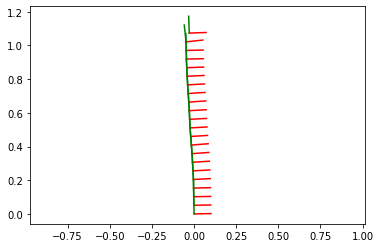

In [0]:
#########################################################################
# STUDENT TODO: Enter your ground truth data from Part 1.
# - final_x: your change in x (in cm)
# - final_y: your change in y (in cm)
# - theta: your measured change in theta (radians)
# You might have to adjust the signs to make the image look correct.
# The resulting graph will show your robot's coordinate frame as it moves
# for the 20+ frames that you captured. It will also show the final pose that
# you measured in Part 1. The units in the resulting plot are in meters.
#########################################################################
final_x = -2.86
final_y = 107.3
theta = 0.03490658503988659
#########################################################################
#                             END OF YOUR CODE                          
#########################################################################

total_dist = math.sqrt(final_x**2 + final_y**2)
thetas = lane_finder.thetas
origin = (0, 0, 0)
current_x = 0
current_y = 0
poses = []
dist_to_travel = (total_dist/len(thetas))

# Intermediate X and Y values are extrapolated by equally dividing the distance
# traveled amongst each frame, and traveling that distance along the calculated
# thetas at each step.
for t in thetas:
  # Some sign manipulation to make the visualization.
  poses.append(gtsam.Pose2(current_x/100, current_y/100, t))
  current_x = current_x + dist_to_travel * math.sin(-t)
  current_y = current_y + dist_to_travel * math.cos(-t)


# Add ground truth pose to the image
poses.append(gtsam.Pose2(final_x/100, final_y/100, theta))    


fig = plt.figure(0)
for i in range(len(poses)):
    gtsam_plot.plot_pose2(0, poses[i])

plt.axis('equal')
plt.show()


In [0]:
# Run this to unmount your google drive folders.
drive.flush_and_unmount()

### Unit Tests

These unit tests will verify the basic functionality of all of the functions you will implement. Note, these are not exhaustive and will just test some basic cases.

In [0]:
import unittest

class TestLaneFinder(unittest.TestCase):

    def setUp(self):
      self.lane_finder = LaneFinder(310, 10, 240, 320, math.radians(30), [50, 100])
  
    def test_compute_orientation(self):
      """
      Tests the compute_orientation function.
      Creates a dummy 300x300 image with parallel lines of white pixels for lane 
      boundaries (only at the scan line rows).
      Note: This test will pass by default, this does not mean your implementation
      is correct. The function will return 0 by default, and this test expects 0.
      Make sure you test your code for robustness on your own as these tests are not exhaustive.
      """

      image = np.zeros((300, 300))
      self.lane_finder.f = 50
      self.lane_finder.camera_pitch = math.radians(0)
      self.lane_finder.v0 = 150
      self.lane_finder.u0 = 150
      image[155][50] = 255
      image[155][250] = 255
      image[160][100] = 255
      image[160][200] = 255

      self.assertEqual(self.lane_finder.compute_orientation(image), 0)
      self.assertEqual(len(self.lane_finder.thetas), 1)
      
    def test_compute_v_coordinate_of_scan_line_in_image(self):
      """
      Tests the compute_v_coordinate_of_scan_line_in_image function.
      Given the parameters used in the setUp function, and some custom parameters,
      verify the implementation of the function.
      """
      
      self.assertAlmostEqual(147, self.lane_finder.compute_v_coordinate_of_scan_line_in_image(50))
      self.assertAlmostEqual(116, self.lane_finder.compute_v_coordinate_of_scan_line_in_image(100))
      self.lane_finder.f = 100
      self.lane_finder.height = 5
      self.lane_finder.camera_pitch = math.radians(45)
      self.assertAlmostEqual(240 + (5-math.sqrt(2)*50), self.lane_finder.compute_v_coordinate_of_scan_line_in_image(100))

    def test_find_lane_boundaries_on_scan_line(self):
      """
      Tests the find_lane_boundaries_on_scan_line function.
      Creates a dummy 3x150 image with two white pixels. Tests the implementation
      to make sure the peaks are found and both returned.
      """
      v = 2
      image = np.zeros((3, 150))
      # Choose two peaks
      peaks = np.array([45, 123])
      
      image[2][peaks] = 255

      pairs = np.array(self.lane_finder.find_lane_boundaries_on_scan_line(image, v))
      self.assertEqual(pairs.shape, (2,))
      self.assertEqual(np.sort(pairs)[0], np.sort(peaks)[0])
      self.assertEqual(np.sort(pairs)[1], np.sort(peaks)[1])
    
    def test_compute_camera_coordinates_from_image_coordinates(self):
      """
      Tests the compute_camera_coordinates_from_image_coordinates_function.
      Uses two different configurations to test the conversion from 2D to 3D coordinates.
      """
      self.lane_finder.height = 320
      self.lane_finder.camera_pitch = 0
      self.assertTrue(all(self.lane_finder.compute_camera_coordinates_from_image_coordinates(320, 320, 320) == np.array([0, 320, 320])))
      self.lane_finder.camera_pitch = math.radians(90)
      self.lane_finder.f = 320
      self.assertTrue(all(self.lane_finder.compute_camera_coordinates_from_image_coordinates(160, 320, 320) == np.array([-160, 0, 320])))

    def test_compute_line_direction_from_points(self):
      """
      Test the compute_line_direction_from_points function.
      Makes sure the line is computed correctly and both points fall on the line.
      """
      P1 = np.array([1, 2, 3])
      P2 = np.array([4, 5, 6])
      line_direction = self.lane_finder.compute_line_direction_from_points(np.array([P1, P2]))
      self.assertEqual(np.sum(np.cross(line_direction, (P2-P1))), 0)
      self.assertTrue(all(np.abs(line_direction) == np.array([3, 3, 3])))

    def test_compute_angle_of_lane_with_optical_axis(self):
      """
      Test the compute_angle_of_lane_with_optical_axis function.
      Uses two simple angles to verify the implementation.
      """
      angle = self.lane_finder.compute_angle_of_lane_with_optical_axis(np.array([1, 2, 1]))
      self.assertAlmostEqual(angle, math.radians(45))
      angle = self.lane_finder.compute_angle_of_lane_with_optical_axis(np.array([100, 5, 100 * math.sqrt(3)]))
      self.assertAlmostEqual(angle, math.radians(30))
      
if __name__ == '__main__':
  unittest.main(argv=['first-arg-is-ignored'], exit=False)


......
----------------------------------------------------------------------
Ran 6 tests in 0.019s

OK


## 3. Reflection [50 points]

Answer the questions in the proj5_part2_report_template.pptx. 
You can find the pptx file in the files tab on Canvas.  
Save the file as a PDF and rename it to LASTNAME1_LASTNAME2_LASTNAME3_LASTNAME4_reflection2.pdf


### Rubric
- 50 pts: Successfully completed the code.
- 50 pts: reflection writeup

### Submission Details
#### Deliverables

You will have these three files to submit for parts 1 and 2. They should be uploaded as separate files and not in a zip.
- saved_images.zip - A zip of your 20 images captured from running `move_forward_and_capture_images.py`
- LASTNAME1_LASTNAME2_LASTNAME3_LASTNAME4_reflection1.pdf: The reflection slides converted to PDF form. 
- LASTNAME1_LASTNAME2_LASTNAME3_LASTNAME4_reflection2.pdf: The reflection slides converted to PDF form. 
- Project5.py (Created from converting .ipynb to .py)
    1. To submit this code, you will need to download this .ipynb file as a .py file (File -> Download as .py).
    2. You will also need to include a screenshot of your unit test results in the reflection PowerPoint (a slide has been marked for that).




Only one person per 4-person group should upload the submission. 